In [1]:
#New Electric Scooter Rental Company wants to launch their ervice in Seoul and needs to analyze existing demand
#We have a database of Seoul Bike Rental from 1st December 2017 to 30th November 2018
#The objective of analysis is to answer the questions: 
        #What conditions affect the number of rented bikes?
        #How does the number of rented bikes change during the week? What are the busiest hours?
        #What are the best days for technical work?
        #Find any other insights for the marketing team

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [3]:
#Importing data from csv files

bikedata = pd.read_csv("SeoulBikeData.csv", encoding=('ISO-8859-1'))

bikedata.shape

(8760, 14)

In [4]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
#Preparing data for future analysis

#Convert Date into datetime type
df = bikedata.copy()
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

#Create Month column
df['Month'] = df['Date'].dt.month_name()

#Create Weekday column
df['Weekday'] = df['Date'].dt.day_name()

#Create Workday bollean combining Holidays and Weekends
df['Holiday'] = df['Holiday'].map({'Holiday':True, 'No Holiday':False}).astype(bool)
df['Weekend'] =  df['Date'].dt.dayofweek > 4
df['Workday'] = np.where((df['Holiday'] == True) | df['Weekend'] == True, False, True)
df.drop('Weekend', axis=1, inplace=True)
df.drop('Holiday', axis=1, inplace=True)

In [6]:
df.isnull().sum()

#No null values was found

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Functioning Day              0
Month                        0
Weekday                      0
Workday                      0
dtype: int64

In [7]:
#Even if we dont have null, we still have 'Functioning Day' column, that can have "No" values
#Lets see how many hours bike rental was unavailable for customers

func = df[df['Functioning Day'] == 'No']
func = func.groupby(func['Date'].dt.month_name())['Functioning Day'].count()
func = func.to_frame().reset_index()
func = func.rename(columns={'Functioning Day':'Hours'})
func['Days'] = round(func['Hours']/24, 1)
func.loc['Total']= func.sum(numeric_only=True, axis=0)
func

,Date,Hours,Days
0,April,24.0,1.0
1,May,24.0,1.0
2,November,72.0,3.0
3,October,79.0,3.3
4,September,96.0,4.0
Total,NaN,295.0,12.3


In [8]:
#There were 295 Non-Functioning Hours during the year
#Lets exclude these rows from future analysis and remove Functioning Day column

df = df[df['Functioning Day'] == "Yes"]
df.drop("Functioning Day", axis=1, inplace=True)

df.shape

(8465, 15)

In [9]:
#Lets see at the final dataframe that we will work with

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Month,Weekday,Workday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,December,Friday,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,December,Friday,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,December,Friday,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,December,Friday,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,December,Friday,True


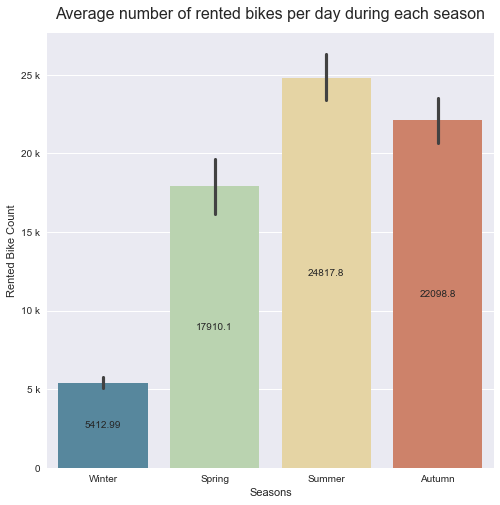

In [11]:
#First of all need to check average Number of Rented Bikes per day in each Season

#We group by season and calculate the number of rented bikes for each day
seasons = df.groupby(['Date', 'Seasons'], as_index=False, sort=False)['Rented Bike Count'].sum()

#Making bar plot for selected data
plt.figure(figsize = (8, 8))
pal1 = ['#4b8ca9', '#b8d9aa', '#f0d999', '#de7959']
ax = sns.barplot(data=seasons, x='Seasons', y='Rented Bike Count', palette = pal1)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_title("Average number of rented bikes per day during each season", fontsize=16, pad=14)
ax.bar_label(ax.containers[0], label_type='center')

plt.style.use('seaborn')
plt.show()


#We clearly see that season affect number of customers
#Winter has 4-5 times lower Number of Rented Bikes than other seasons

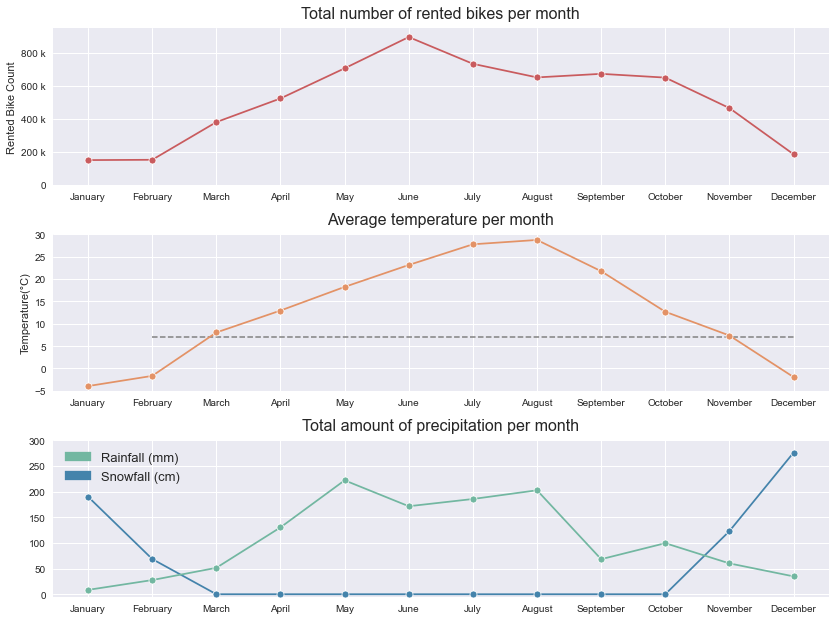

,0,1,2,3,4,5,6,7,8,9,10,11
Month,January,February,March,April,May,June,July,August,September,October,November,December
Rented Bike Count,150006,151833,380594,524227,707088,896887,734460,651887,673612,650675,465715,185330
Temperature °C,-3.9,-1.7,8.0,13.0,18.2,23.1,27.8,28.7,21.7,12.7,7.4,-1.9
Rainfall(mm),8.5,27.6,51.5,130.3,222.0,171.5,185.6,202.6,68.3,99.5,60.1,34.8
Snowfall (cm),190.0,68.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,276.0


In [12]:
#Now let's check correlation between Number of Rented Bikes, Temeperature  and Precipitation per each month

df['Month'] = pd.Categorical(df['Month'], 
                          categories = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 
                                        'September', 'October', 'November', 'December'], ordered = True)


data1 = df.groupby('Month', as_index=False, sort=False)['Rented Bike Count'].sum()
data2 = df.groupby('Month', as_index=False, sort=False)['Temperature(°C)'].mean()
data3 = df.groupby('Month', as_index=False, sort=False)[['Rainfall(mm)', 'Snowfall (cm)']].sum()

#Making line plots for selected data
fig, ax = plt.subplots(3, figsize=(12,9))
fig.tight_layout(pad=3)

g1 = sns.lineplot(data=data1, x='Month', y='Rented Bike Count', color='#c95b5e', marker='o', ax=ax[0])
g1.set(ylim=(0, 950000))
g1.yaxis.set_major_formatter(ticker.EngFormatter())
g1.set_title("Total number of rented bikes per month", fontsize=16, pad=10)
g1.set(xlabel=None)

g2 = sns.lineplot(data=data2, x='Month', y='Temperature(°C)', color='#e39266', marker='o', ax=ax[1])
g2.set_title("Average temperature per month", fontsize=16, pad=10)
g2.hlines(y=7, xmin='February', xmax='December', linewidth=1.5, color='gray', linestyle = '--')
g2.set(ylim=(-5, 30))
g2.set(xlabel=None)

g3 = sns.lineplot(data=data3, x='Month', y='Snowfall (cm)', color='#4483ab', marker='o', ax=ax[2])
g3.set_title("Average temperature per month", fontsize=16, pad=10)
g3.set(xlabel=None, ylabel=None)

g4 = sns.lineplot(data=data3, x='Month', y='Rainfall(mm)', color='#72b7a1', marker='o', ax=ax[2])
g4.set_title("Total amount of precipitation per month", fontsize=16, pad=10)
g4.set(ylim=(-5, 300))
g4.set(xlabel=None, ylabel=None)
top = mpatches.Patch(color='#72b7a1', label='Rainfall (mm)')
bottom = mpatches.Patch(color='#4483ab', label='Snowfall (cm)')
g4 = plt.legend(handles=[top, bottom], loc="upper left", fontsize=13)

plt.show()

data1['Temperature °C'] = round(data2['Temperature(°C)'], 1)
data1[['Rainfall(mm)', 'Snowfall (cm)']] = data3[['Rainfall(mm)', 'Snowfall (cm)']]
data1.T 


#There is a strong correlation betweeen Temperature and Number of rental bike for each month
#People starts using bikes more actively when the average temperature rises above 7°C
#June has the rainfall at summers lowest, while the temperature haven't reached the peak
#This can be a reason why June has the highest number of rentals with 896,887 bikes rented

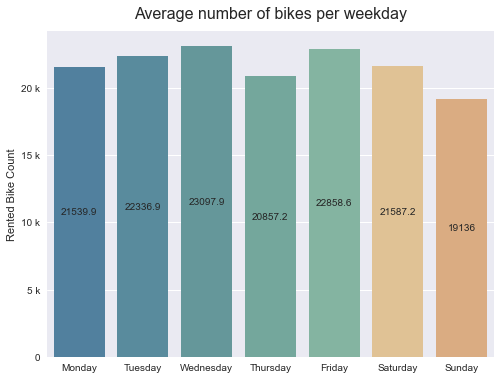

In [13]:
#Further we will exclude Winter and analyze data from Spirng to Autumn
df2 = df.copy()
df2 = df2[df2["Seasons"] != 'Winter']


#Lets see how number of daily rented biked spread during the weak

week = df2.groupby(['Date', 'Weekday'], as_index=False, sort=False)['Rented Bike Count'].sum()
week['Weekday'] = pd.Categorical(week['Weekday'], 
                          categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                        'Friday', 'Saturday', 'Sunday'], ordered = True)

plt.figure(figsize = (8, 6))
pal2 = ['#4483ab', '#4e90a8','#5c9fa3','#6bb0a1', '#7cbca3', '#edc588', '#e9ab73']
ax = sns.barplot(data=week, x='Weekday', y='Rented Bike Count', ci=None, palette=pal2)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_title("Average number of bikes per weekday", fontsize=16, pad=12)
ax.bar_label(ax.containers[0], label_type='center')
ax.set(xlabel=None)

plt.show()


#We can see that Sunday is the least popular day for bike rental
#Wednesday and Friday are peak usages days 
#Overall there are no big difference in usage during the week

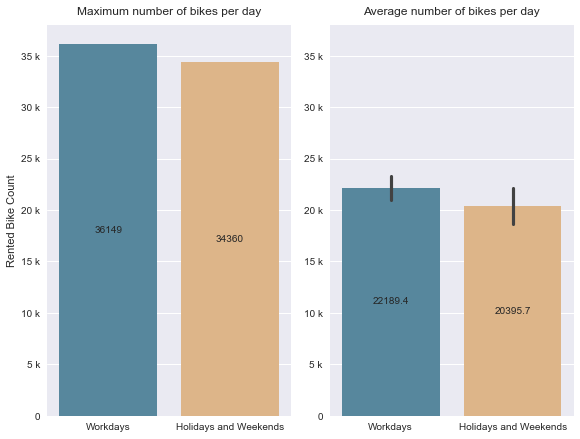

In [14]:
#Lets check if Holidays and Weekends affect the number of rented bikes


#Calculate average and maximum number of Total Rented Bike Number for Holiday and Non-Holiday
data4 = df2.copy()
data5 = data4.groupby(['Date', 'Workday'], as_index=False, sort=False)['Rented Bike Count'].sum()
data5['Workday'] = pd.Categorical(data5['Workday'], categories = [True, False], ordered = True)
data6 = data5.groupby('Workday', as_index=False, sort=False)['Rented Bike Count'].max()
data6['Workday'] = pd.Categorical(data6['Workday'], categories = [True, False], ordered = True)

#Making bar plots for max and mean values
fig, ax = plt.subplots(1, 2, figsize=(8,6))
fig.tight_layout()
pal3 = ['#4b8ca9', '#ebb67b']

g1 = sns.barplot(data=data6, x='Workday', y='Rented Bike Count', palette=pal3,  ax=ax[0])
g1.yaxis.set_major_formatter(ticker.EngFormatter())
g1.set_title("Maximum number of bikes per day", pad=10)
g1.bar_label(g1.containers[0], label_type='center')
g1.set_xticklabels(['Workdays', 'Holidays and Weekends'])
g1.set(ylim=(0, 38000))
g1.set(xlabel=None)

g2 = sns.barplot(data=data5, x='Workday', y='Rented Bike Count', palette=pal3, ax=ax[1])
g2.yaxis.set_major_formatter(ticker.EngFormatter())
g2.set_title("Average number of bikes per day", pad=10)
g2.bar_label(g2.containers[0], label_type='center')
g2.set_xticklabels(['Workdays', 'Holidays and Weekends'])
g2.set(ylim=(0, 38000))
g2.set(xlabel=None, ylabel=None)

plt.show()


#The maximum and average number of Rented Bikes are both bigger for Workdays
#While the difference is not big, we will futher look at data seprated by this parameter

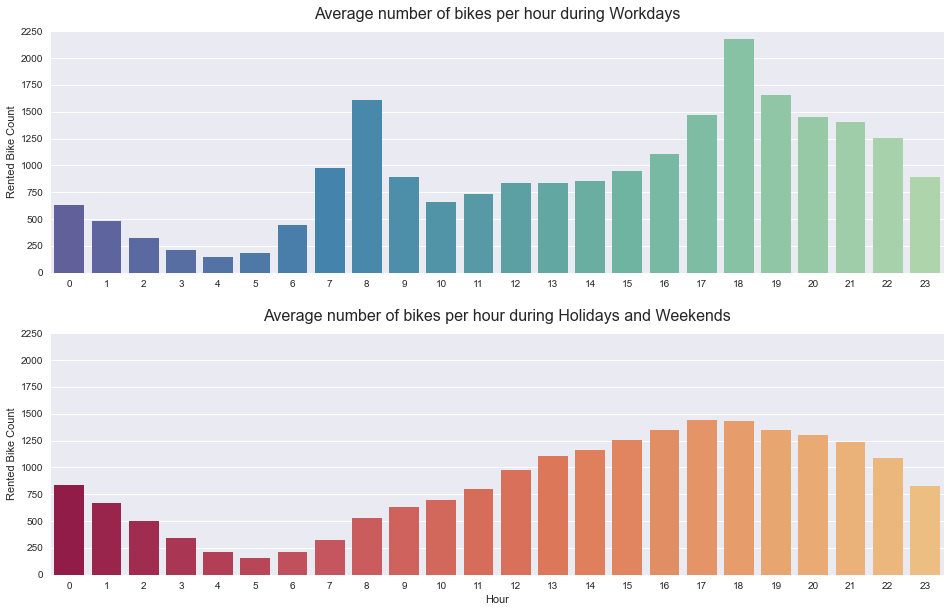

In [17]:
#Here we will look at 2 plots by hours: for Holidays + Weekends and for Workdays

hour1 = df2.query('Workday == False')
hour2 = df2.query('Workday == True')

#Making bar plots average number of bikes per hour 
fig, ax = plt.subplots(2, figsize=(16,10))
plt.subplots_adjust(hspace=0.25)

g1 = sns.barplot(data=hour2, x='Hour', y='Rented Bike Count', 
                 palette=sns.color_palette("Spectral_r", 80), ci= None, ax=ax[0])
g1.set_title("Average number of bikes per hour during Workdays", fontsize=16, pad=12)
g1.set(ylim=(0, 2250))
g1.set(xlabel=None)

g2 = sns.barplot(data=hour1, x='Hour', y='Rented Bike Count', 
                 palette=sns.color_palette("Spectral", 70), ci= None, ax=ax[1])
g2.set_title("Average number of bikes per hour during Holidays and Weekends", fontsize=16, pad=12)
g2.set(ylim=(0, 2250))

plt.show()


#On Workdays there are two zones with a peak number of rented bikes: rush hours at 8 and 18
#While on Weekends and Holidays we can see тormal distribution of rented bikes during the day

In [ ]:
#Conclusion

#Winter is the least popular season for rental bikes
#On average, 5 times fewer bikes are rented in winter, however there still about 5000 bikes rented every day
#People start using bikes more actively when the average temperature rises above 7°C
#June is the peak usage month with nearly 30,000 daily rented bikes

#While the Holidays and Weekends have less customers and number can vary a lot, there is no big diffenrce in average number
#People use rental bikes during rush hours on workdays the most, which meas that many customers use bikes for commute
#We need to be sure there are enough scooters in the morning near the residential areas and near the offices at the evening
#On holidays and weekends number of rented bikes spreads normaly during the day

#Winter is the best time to carry out major repairs during the year
#During the week the best day will be Sunday
#For daily repairs the best time is from 2 until 6

#On marketing campaign we need to focus attantion that with electric scooter commute time will be much shorter
#We can try to attract more clients in winter with smaller prices or discounts
#On Weekends and Holiday special offers or day passes can be also an option, 
        #that way we will attract clients who prefer public or private transport during the week